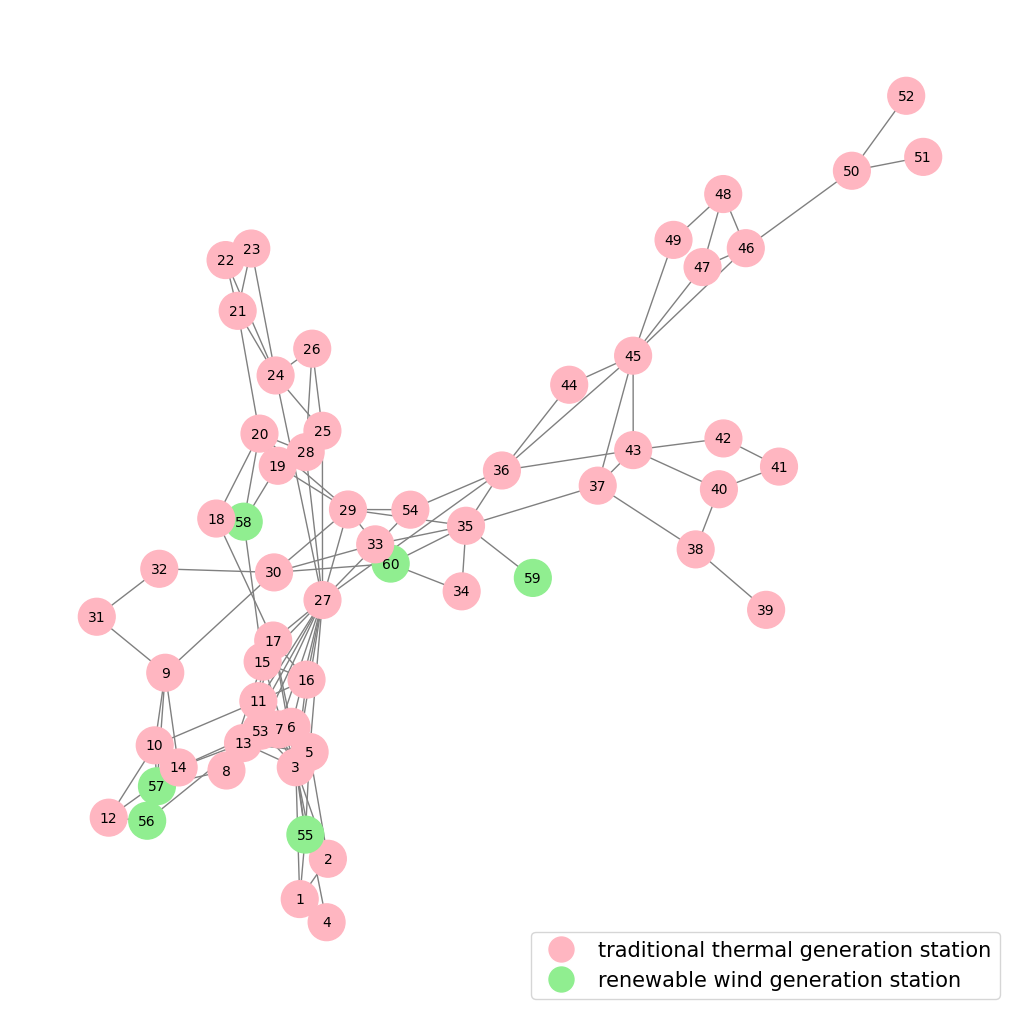

In [2]:
import pandas as pd

# Load the data from the provided Excel files
generator_bus_df = pd.read_excel('./real-data/wind-generator-bus.xlsx')
transmission_line_df = pd.read_excel('./real-data/transmission line data.xlsx')

# Display the first few rows of the dataframes to understand their structure
#generator_bus_df.head(), transmission_line_df.head()

import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np

# 假设 generator_bus_df 和 transmission_line_df 已经被正确定义并处理

# 重命名列以提高清晰度
generator_bus_df.columns = ['Generator', 'Bus']
transmission_line_df.columns = transmission_line_df.iloc[0]
transmission_line_df = transmission_line_df.drop(0)

# 将列转换为适当的类型
generator_bus_df['Generator'] = generator_bus_df['Generator'].astype(int)
generator_bus_df['Bus'] = generator_bus_df['Bus'].astype(int)
transmission_line_df['From Bus'] = transmission_line_df['From Bus'].astype(int)
transmission_line_df['To Bus'] = transmission_line_df['To Bus'].astype(int)

# 构建总线连接的无向图
G_bus = nx.Graph()
G_bus.add_edges_from(zip(transmission_line_df['From Bus'], transmission_line_df['To Bus']))

# 提取带有发电机的总线集合
generator_buses = set(generator_bus_df['Bus'])

# 检查两个总线是否通过其他不带发电机的总线连接的函数
def are_generators_connected(bus1, bus2):
    try:
        # 找到避免其他发电机总线的两个总线之间的最短路径
        path = nx.shortest_path(G_bus, source=bus1, target=bus2)
        for bus in path:
            if bus != bus1 and bus != bus2 and bus in generator_buses:
                return False
        return True
    except nx.NetworkXNoPath:
        return False

# 构建发电机连接的无向图
G_gen = nx.Graph()
generators = generator_bus_df['Generator'].tolist()

for i, gen1 in enumerate(generators):
    for gen2 in generators[i+1:]:
        bus1 = generator_bus_df.loc[generator_bus_df['Generator'] == gen1, 'Bus'].values[0]
        bus2 = generator_bus_df.loc[generator_bus_df['Generator'] == gen2, 'Bus'].values[0]
        if are_generators_connected(bus1, bus2):
            G_gen.add_edge(gen1, gen2)

# 确保生成器节点按生成器编号顺序排列
#generators_sorted = sorted(generators)
generators_sorted = generators

# 定义节点颜色：前54个节点红色，后6个节点绿色
node_colors = ['lightgreen' if i==3 or i==16 or i==23 or i==24 or i==39 or i==44 else 'lightpink' for i in range(len(generators_sorted))]

# 创建节点标签字典
labels = {gen: gen for gen in generators_sorted}

# 绘制发电机连接的无向图
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_gen)
nx.draw(G_gen, pos, with_labels=True, labels=labels, 
        node_color=node_colors, edge_color='gray', node_size=700, font_size=10) 
plt.title("") 
# 创建图例
'''red_patch = mpatches.Patch(color='palevioletred', label='traditional thermal generation station')
green_patch = mpatches.Patch(color='darkseagreen', label='renewable wind generation station')
plt.legend(handles=[red_patch, green_patch])'''
# 创建圆形图例
red_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightpink', markersize=20, label='traditional thermal generation station')
green_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=20, label='renewable wind generation station')
plt.legend(handles=[red_circle, green_circle], fontsize=15, loc='lower right')

#plt.savefig('./figures/01-network.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-network.png',format='png', bbox_inches='tight')

plt.show()

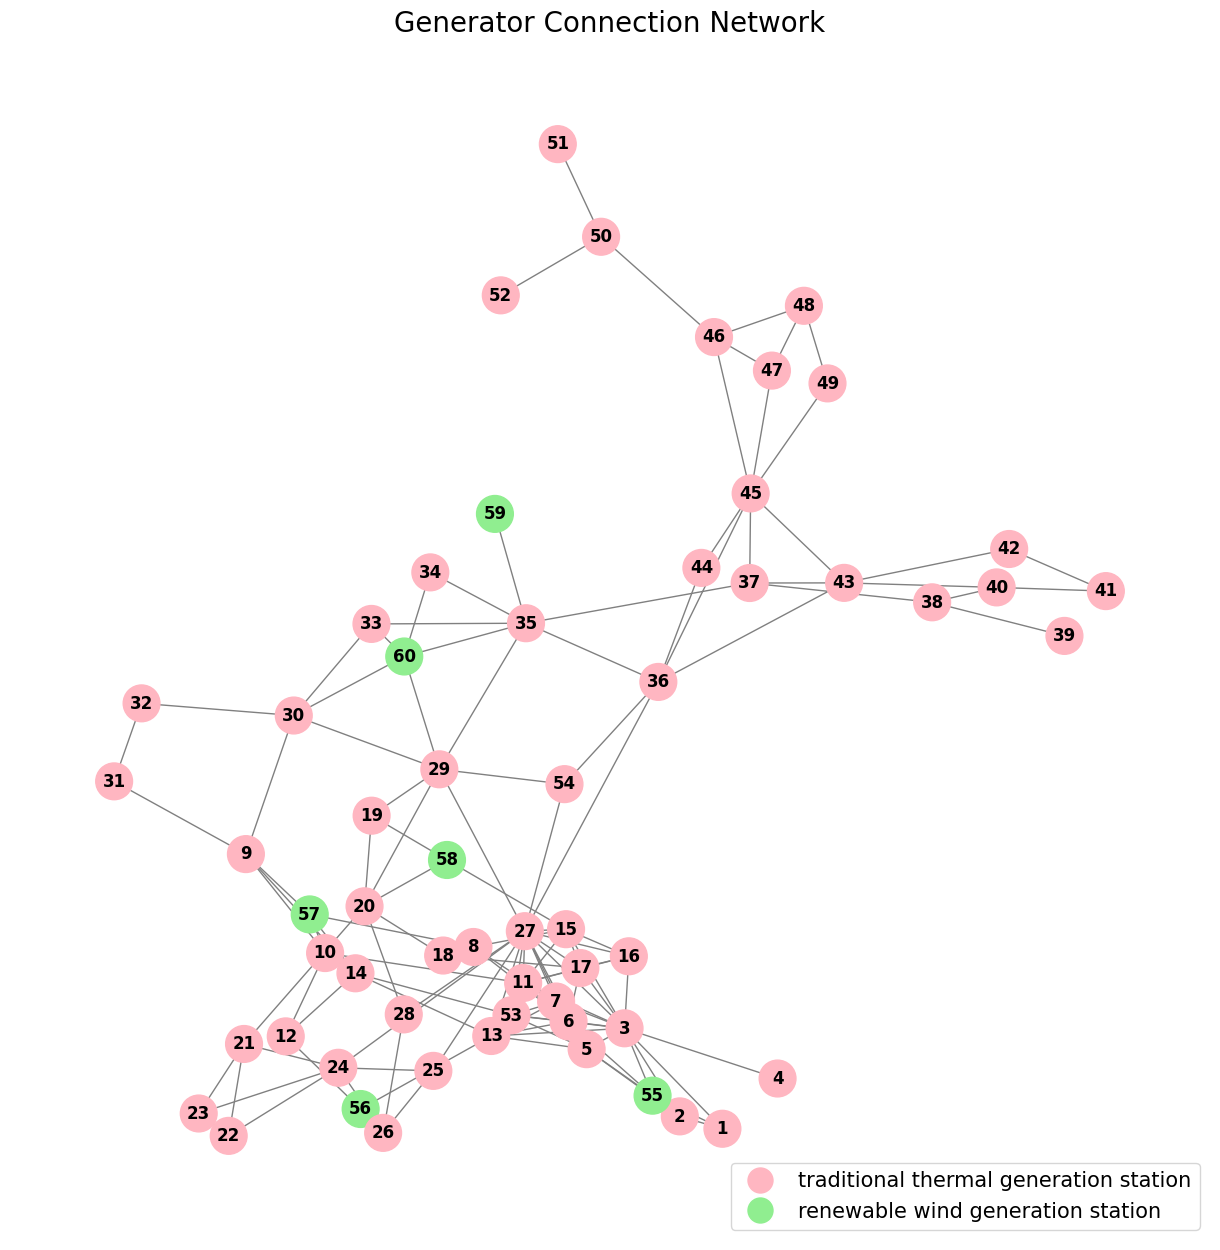

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.lines import Line2D

# Load the data from the provided Excel files
generator_bus_df = pd.read_excel('./real-data/wind-generator-bus.xlsx')
transmission_line_df = pd.read_excel('./real-data/transmission line data.xlsx')

# Rename columns for clarity
generator_bus_df.columns = ['Generator', 'Bus']
transmission_line_df.columns = transmission_line_df.iloc[0]
transmission_line_df = transmission_line_df.drop(0)

# Convert columns to appropriate types
generator_bus_df['Generator'] = generator_bus_df['Generator'].astype(int)
generator_bus_df['Bus'] = generator_bus_df['Bus'].astype(int)
transmission_line_df['From Bus'] = transmission_line_df['From Bus'].astype(int)
transmission_line_df['To Bus'] = transmission_line_df['To Bus'].astype(int)

# Construct undirected graph for bus connections
G_bus = nx.Graph()
G_bus.add_edges_from(zip(transmission_line_df['From Bus'], transmission_line_df['To Bus']))

# Extract set of buses with generators
generator_buses = set(generator_bus_df['Bus'])

# Function to check if two buses are connected via other buses without generators
def are_generators_connected(bus1, bus2):
    try:
        path = nx.shortest_path(G_bus, source=bus1, target=bus2)
        for bus in path:
            if bus != bus1 and bus != bus2 and bus in generator_buses:
                return False
        return True
    except nx.NetworkXNoPath:
        return False

# Construct undirected graph for generator connections
G_gen = nx.Graph()
generators = generator_bus_df['Generator'].tolist()

for i, gen1 in enumerate(generators):
    for gen2 in generators[i+1:]:
        bus1 = generator_bus_df.loc[generator_bus_df['Generator'] == gen1, 'Bus'].values[0]
        bus2 = generator_bus_df.loc[generator_bus_df['Generator'] == gen2, 'Bus'].values[0]
        if are_generators_connected(bus1, bus2):
            G_gen.add_edge(gen1, gen2)

# Ensure generator nodes are sorted by generator number
generators_sorted = generators

# Define node colors
node_colors = ['lightgreen' if i == 3 or i == 16 or i == 23 or i == 24 or i == 39 or i == 44 else 'lightpink' for i in range(len(generators_sorted))]

# Create node labels dictionary
labels = {gen: gen for gen in generators_sorted}

# Plot the graph
plt.figure(figsize=(12, 12))

# Adjust spring_layout parameters for a more compact layout
pos = nx.spring_layout(G_gen, k=0.15, iterations=50)

nx.draw(G_gen, pos, with_labels=True, labels=labels, node_color=node_colors, edge_color='gray', node_size=700, font_size=12, font_weight='bold')

# Create legend
red_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightpink', markersize=20, label='traditional thermal generation station')
green_circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=20, label='renewable wind generation station')
plt.legend(handles=[red_circle, green_circle], fontsize=15, loc='lower right')

plt.title("Generator Connection Network", fontsize=20)

# Show plot
plt.show()


In [7]:
adj_matrix = nx.adjacency_matrix(G_gen, nodelist=generators_sorted).todense() #这是根据通信无向图生成的邻接矩阵
adj_matrix_aux = adj_matrix.astype(float)
#将上述邻接矩阵的对角元素设置成1
for i in range(0, 60):
    for j in range(0,60):
        if i==j:
            adj_matrix_aux[i][j]=1.0
#根据邻接矩阵生成双随机的权重矩阵
degree=[] #先生成一个记录每个节点度的列表
#计算每个节点的度
for i in range(0,60):
    k=0
    for j in range(0,60):
        if i!=j and adj_matrix_aux[i][j]==1.0:
            k=k+1
    degree.append(k)

In [8]:
for i in range(0,60):
    a=0
    for j in range(0,60):
        if i!=j and adj_matrix_aux[i][j]!=0:
            adj_matrix_aux[i][j]=1/(max(degree[i],degree[j])+0.5)
            a=a+adj_matrix_aux[i][j]
    adj_matrix_aux[i][i]=1-a

In [10]:
adj_matrix_aux[0]

array([0.52699408, 0.22222222, 0.06896552, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18181818,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [11]:
#验证矩阵adj_matrix_aux是否满足双随机性质
for i in range(0,60):
    k=0
    for j in range(0,60):
        k=k+adj_matrix_aux[i][j]
    print(k)

for i in range(0,60):
    k=0
    for j in range(0,60):
        k=k+adj_matrix_aux[j][i]
    print(k)

1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [12]:
#数据存储
np.savetxt('IEEE-118-doubly-stochastic-weight-matrix.txt',adj_matrix_aux,fmt='%0.8f')#数据存储

In [1]:
#计算每个发电站的邻居发电站
import numpy as np

E=np.loadtxt("IEEE-118-doubly-stochastic-weight-matrix.txt")

neighbor_help=[]
for i in range (0,60):
    for j in range (0,60):
        if E[i][j]!=0:
            neighbor_help.append(j)
        elif E[i][j]==0:
            neighbor_help.append(99)
neighbor=np.array(neighbor_help).reshape(60,60)
#选取两个拜占庭节点 在图中为54（火力发电站） 和 59 （风能发电站） 对应到邻接矩阵中的id为 53和58
#或者风能发电站还可以选取56号 id：55

In [2]:
for i in range(0,60):
    if neighbor[57][i]!=99:
        print(neighbor[57][i])

14
18
19
57


In [5]:
for i in range(0,60):
    if neighbor[19][i]!=99:
        print(neighbor[19][i])

17
18
19
20
27
28
57


In [1]:
import numpy as np

E_0_1=np.loadtxt("IEEE-118-doubly-stochastic-weight-matrix.txt")

for i in range(0,60):
    E_0_1[i][i]=0
    for j in range(0,60):
        if E_0_1[i][j]>0:
            E_0_1[i][j]=1

In [2]:
E_0_1

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
#数据存储
np.savetxt('IEEE-118-Adjacency-Matrix-0-1.txt',E_0_1,fmt='%0.8f')#数据存储

In [4]:
import pandas as pd
import numpy as np

# 创建一个示例矩阵
matrix = np.loadtxt("IEEE-118-Adjacency-Matrix-0-1.txt")

# 将矩阵转换为 DataFrame
df = pd.DataFrame(matrix)

# 保存 DataFrame 为 XLSX 文件
df.to_excel('IEEE-118-Adjacency-Matrix-0-1.xlsx', index=False, header=False)

print("矩阵已成功保存为 matrix.xlsx 文件")


矩阵已成功保存为 matrix.xlsx 文件
